<a href="https://colab.research.google.com/github/AntonyLeons/Data-Mining-ACW/blob/master/Legacy_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Legacy Data

In [1]:
import pandas as pd
import numpy as np
import random as rand # import libs
import seaborn as sns
import sklearn
import sklearn.tree as tree
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [2]:
# from google.colab import files  # If running on google upload data

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))
# %notebook inline

In [3]:
data=pd.read_csv('data/600092_data.csv') # import CSV

In [4]:
print(data.dtypes) # see types, conta is not a int. IPSI is float but can be an int however this should not affect the model
print(f"total heading {len(data.columns)}")

Random          float64
Id                int64
Indication       object
Diabetes         object
IHD              object
Hypertension     object
Arrhythmia       object
History          object
IPSI            float64
Contra           object
label            object
dtype: object
total heading 11


In [5]:
data.describe(include = 'all') # Data summary

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
count,1520.000000,1520.000000,1517,1518,1520,1517,1520,1518,1516.000000,1520,1517
unique,NaN,NaN,5,2,2,2,2,2,NaN,41,3
top,NaN,NaN,A-F,no,no,no,no,no,NaN,100,NoRisk
freq,NaN,NaN,493,1441,801,784,1190,1494,NaN,244,1008
mean,0.509545,188365.022368,NaN,NaN,NaN,NaN,NaN,NaN,78.872032,NaN,NaN
std,0.284006,64355.870242,NaN,NaN,NaN,NaN,NaN,NaN,10.162351,NaN,NaN
min,0.000295,78261.000000,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN
25%,0.268531,137130.750000,NaN,NaN,NaN,NaN,NaN,NaN,73.000000,NaN,NaN
50%,0.517616,191344.500000,NaN,NaN,NaN,NaN,NaN,NaN,77.000000,NaN,NaN
75%,0.754724,244559.500000,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,NaN,NaN


In [6]:
data.head(15) # quick look at the data

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
5,0.916897,169990,A-F,no,no,no,yes,no,95.0,95,Risk
6,0.383408,196122,A-F,no,yes,yes,no,no,90.0,95,Risk
7,0.538333,261057,CVA,no,no,no,no,no,75.0,60,NoRisk
8,0.678157,256128,TIA,no,no,yes,no,no,81.0,20,NoRisk
9,0.689331,196936,A-F,no,no,yes,yes,no,95.0,100,Risk


In [7]:
for headings in data.columns:
    print(f"{headings} {data[headings].nunique()}")  # get total distict for each column

Random 1222
Id 1520
Indication 5
Diabetes 2
IHD 2
Hypertension 2
Arrhythmia 2
History 2
IPSI 29
Contra 41
label 3


In [8]:
# random should be unique according to the data decription but in the id is Unique and Random has ~200 repeats, this implies the columns have been switched.
# label also has 3 values but should be nominal with Risk and NoRisk values

In [9]:
data_copy = data.copy() #copy original dataframe

In [10]:
duplicated = data_copy['Random'].duplicated(keep=False)
data_copy[duplicated].sort_values(by=['Random']).head(30) # we can see the duplicated random records are unique

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
1122,0.000314,102033,ASx,no,no,no,no,no,95.0,10,NoRisk
1120,0.000314,99636,TIA,no,no,no,no,yes,75.0,100,NoRisk
916,0.004501,281679,A-F,no,no,no,no,no,NaN,50,NoRisk
914,0.004501,223035,A-F,no,no,no,no,no,80.0,25,NoRisk
991,0.004501,178402,CVA,no,no,no,no,no,70.0,40,NoRisk
278,0.022231,134091,A-F,no,no,yes,yes,no,90.0,30,Risk
276,0.022231,89583,A-F,no,yes,no,no,no,75.0,35,NoRisk
244,0.024023,171350,TIA,no,yes,yes,no,no,80.0,100,Risk
261,0.024023,175170,TIA,no,no,no,no,no,75.0,75,NoRisk
13,0.025356,224025,CVA,no,yes,yes,yes,no,75.0,50,Risk


In [11]:
data_copy.set_index('Id',inplace=True,verify_integrity=True) # setting unique index as Id is unique

In [12]:
data.set_index('Id',inplace=True,verify_integrity=True) # setting unique index as Id is unique for reference

In [13]:
data_copy['Contra'] = pd.to_numeric(data_copy['Contra'],errors='coerce') # convert conta to numberic values replacing invalid with NaNs
data_copy.dtypes # conta now numeric 

Random          float64
Indication       object
Diabetes         object
IHD              object
Hypertension     object
Arrhythmia       object
History          object
IPSI            float64
Contra          float64
label            object
dtype: object

In [14]:
data_copy['label'].unique() # only 2 possible values

array(['NoRisk', 'Risk', 'Unknown', nan], dtype=object)

In [15]:
data_copy["label"] = data_copy['label'].replace('Unknown',np.nan)

In [16]:
data_copy['label'].unique()

array(['NoRisk', 'Risk', nan], dtype=object)

In [17]:
data_copy['Indication'].unique()  # Data Decription says only 4 possible values

array(['A-F', 'TIA', 'CVA', 'ASx', 'Asx', nan], dtype=object)

In [18]:
data_copy['Indication'] = data_copy['Indication'].replace('Asx','ASX')
data_copy['Indication'] = data_copy['Indication'].replace('ASx','ASX')

In [19]:
data_copy['Indication'].unique()

array(['A-F', 'TIA', 'CVA', 'ASX', nan], dtype=object)

Indication      3
Diabetes        2
Hypertension    3
History         2
IPSI            4
Contra          1
label           5
dtype: int64
total  20
Percent 1.32%


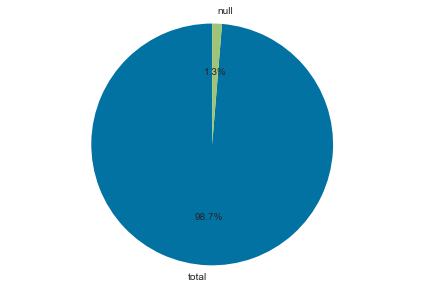

In [20]:
null_headings = data_copy.isnull().any()
null_columns = data_copy.columns[null_headings]
null_column_count = data_copy[null_columns].isnull().sum() 
# find the number of null values in each column
total_null = null_column_count.sum()
print(null_column_count)
print(f"total  {total_null}") # total records containing null values
percent = (total_null/len(data_copy.index))*100
print(f"Percent {percent:.3}%") #  20 records contain null

labels = ['total','null']
values = [len(data_copy.index),total_null]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.show()


In [21]:
null_records = pd.DataFrame(columns=data_copy.columns)
for headings in null_columns:
    null_records = null_records.append(data_copy[data_copy[headings].isnull()]) #append all records with null values to dataframe
null_records # show all null records

,Random,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
261060,0.648122,NaN,no,yes,yes,no,no,70.0,40.0,NoRisk
205845,0.211760,NaN,no,yes,no,no,no,80.0,100.0,Risk
256076,0.761219,NaN,no,no,no,yes,yes,99.0,100.0,Risk
224257,0.681744,CVA,NaN,yes,yes,yes,no,90.0,100.0,Risk
210861,0.392130,A-F,NaN,no,yes,no,no,80.0,40.0,NoRisk
240232,0.388790,CVA,yes,no,NaN,yes,no,95.0,90.0,Risk
289096,0.707950,A-F,no,no,NaN,no,no,78.0,30.0,NoRisk
158024,0.319215,TIA,no,no,NaN,no,no,75.0,75.0,NoRisk
260770,0.617072,CVA,no,yes,no,no,NaN,85.0,50.0,NoRisk
196483,0.243645,CVA,no,no,yes,yes,NaN,95.0,100.0,Risk


In [22]:
data.loc[254469] # check what contra was before replacement

Random          0.518558
Indication           ASx
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                  
label             NoRisk
Name: 254469, dtype: object

In [23]:
data_copy.dropna(inplace=True) # drop na and nan records

In [24]:
data_copy.describe(include = 'all') # check 20 records removed

,Random,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
count,1500.000000,1500,1500,1500,1500,1500,1500,1500.000000,1500.000000,1500
unique,NaN,4,2,2,2,2,2,NaN,NaN,2
top,NaN,A-F,no,no,no,no,no,NaN,NaN,NoRisk
freq,NaN,489,1425,789,777,1177,1478,NaN,NaN,1000
mean,0.509543,NaN,NaN,NaN,NaN,NaN,NaN,78.828000,56.668000,NaN
std,0.284369,NaN,NaN,NaN,NaN,NaN,NaN,10.159555,29.524977,NaN
min,0.000295,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,10.000000,NaN
25%,0.267899,NaN,NaN,NaN,NaN,NaN,NaN,73.000000,30.000000,NaN
50%,0.517616,NaN,NaN,NaN,NaN,NaN,NaN,77.000000,50.000000,NaN
75%,0.754724,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,85.000000,NaN


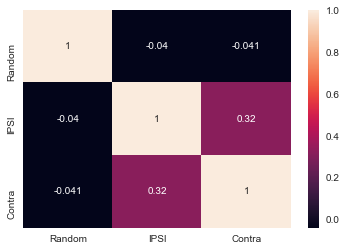

In [25]:
corr = data_copy.corr()
sns.heatmap(corr,annot=True) # random has no corolation

In [26]:
class_data = data_copy.copy()
class_data = class_data.drop(columns=['Random'])
class_data

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
Id,,,,,,,,,
218242,A-F,no,no,yes,no,no,78.0,20.0,NoRisk
159284,TIA,no,no,no,no,no,70.0,60.0,NoRisk
106066,A-F,no,yes,yes,no,no,95.0,40.0,Risk
229592,TIA,no,no,yes,no,no,90.0,85.0,Risk
245829,CVA,no,no,no,no,no,70.0,20.0,NoRisk
...,...,...,...,...,...,...,...,...,...
93406,A-F,no,yes,no,no,no,76.0,60.0,NoRisk
121814,A-F,no,no,yes,yes,no,90.0,75.0,Risk
101754,TIA,no,no,yes,no,no,75.0,20.0,NoRisk


# Visualisation

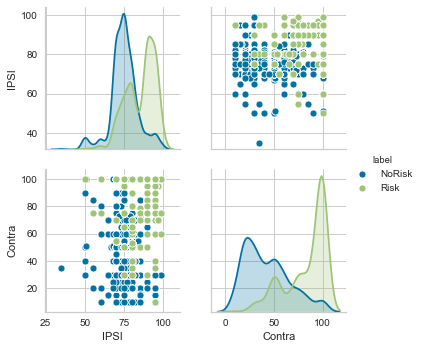

In [27]:
sns.pairplot(class_data, hue='label')

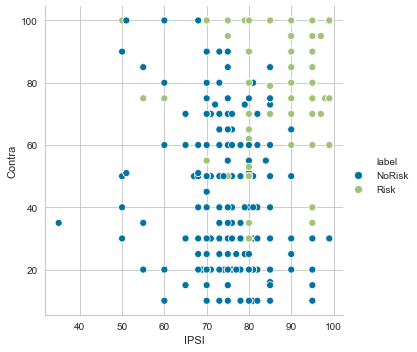

In [28]:
sns.relplot(x='IPSI',y='Contra',hue='label',data=class_data) # closer look

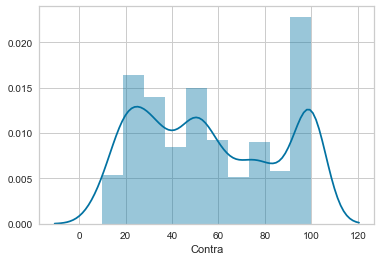

In [29]:
sns.distplot(class_data['Contra']) # look for pattern in distribution

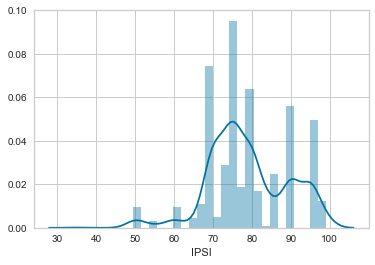

In [30]:
sns.distplot(class_data['IPSI'])  # look for pattern in distribution

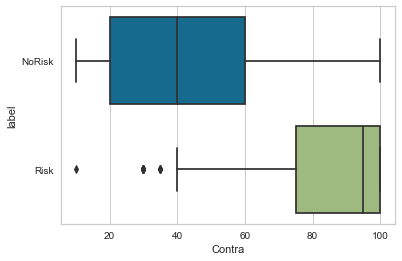

In [31]:
sns.boxplot(x='Contra',y='label',data=class_data)
plt.show()

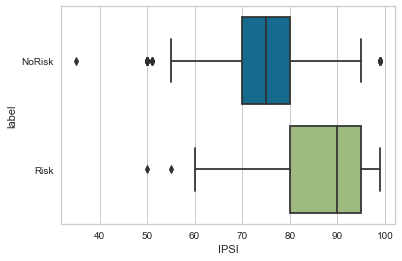

In [32]:
sns.boxplot(x='IPSI',y='label',data=class_data)
plt.show()

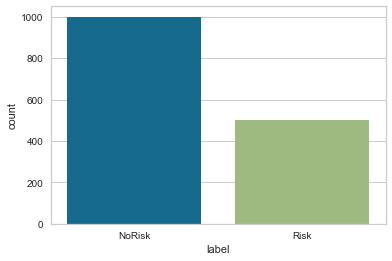

In [33]:
sns.countplot(class_data['label'],Label='count') # count risk

## Data prep

In [34]:
le = preprocessing.LabelEncoder()
model_data=class_data.copy()
model_data['label']=le.fit_transform(class_data['label'])
model_data['Diabetes']=le.fit_transform(class_data['Diabetes'])
model_data['IHD']=le.fit_transform(class_data['IHD'])
model_data['Hypertension']=le.fit_transform(class_data['Hypertension'])
model_data['Arrhythmia']=le.fit_transform(class_data['Arrhythmia'])
model_data['History']=le.fit_transform(class_data['History'])
model_data['Indication']=le.fit_transform(class_data['Indication']) # alphabetical

model_data.head()

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
Id,,,,,,,,,
218242,0,0,0,1,0,0,78.0,20.0,0
159284,3,0,0,0,0,0,70.0,60.0,0
106066,0,0,1,1,0,0,95.0,40.0,1
229592,3,0,0,1,0,0,90.0,85.0,1
245829,2,0,0,0,0,0,70.0,20.0,0


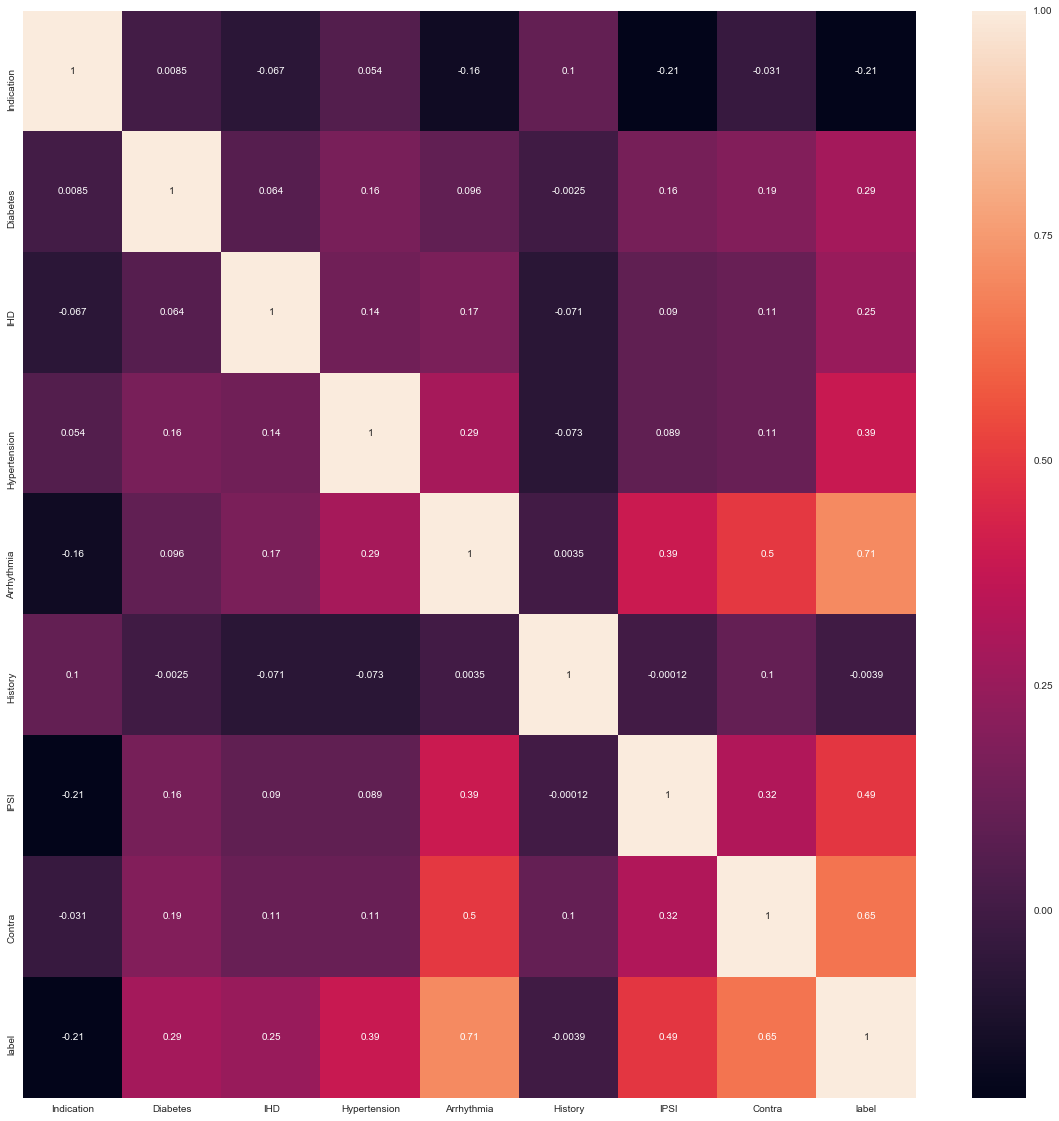

In [35]:
o_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = (20,20)
corr = model_data.corr()
sns.heatmap(corr,annot=True)

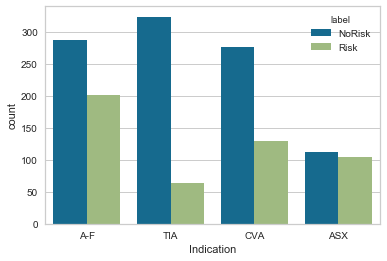

In [36]:
plt.rcParams["figure.figsize"] = o_size
sns.countplot(x='Indication',hue='label',data=class_data) # Weak correlation but still a valid indicator

In [37]:
split = sklearn.model_selection.train_test_split(model_data,shuffle=True)
train = split[0]
test = split[1]
all_x = model_data.drop(columns=['label']) 
all_y = model_data['label']

## Logistic Regression

In [38]:
model = LogisticRegression(solver='lbfgs')
train_x = train['Contra']
train_y = train['label']
test_x = test['Contra']
test_y = test['label']

In [39]:
train_x = np.asarray(train_x).reshape(-1,1)
train_y = np.asarray(train_y)
test_x = np.asarray(test_x).reshape(-1,1)
test_y = np.asarray(test_y)
print(train_x.shape)
print(train_y.shape)

(1125, 1)
(1125,)


In [40]:
reg_model = model.fit(X=train_x,y=train_y)

In [41]:
pred_y = reg_model.predict(test_x)

In [42]:
reg_model.score(test_x,test_y)

0.832

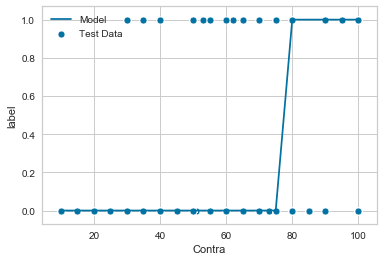

In [43]:
sns.lineplot(x=test['Contra'], y=pred_y.ravel(), label='Model')
sns.scatterplot(x=test['Contra'], y=test['label'], label='Test Data')

In [44]:
reg_model = LogisticRegression(solver='lbfgs',max_iter=500, class_weight="balanced") 
train_x = train.drop(columns=['label'])  # class_weight is balenced as indication is >1
train_y = train['label']
test_x = test.drop(columns=['label']) # remove label from test
test_y = test['label']
# 100 iterations creates convergence issues

In [45]:
reg_model = reg_model.fit(X=train_x,y=train_y)
pred_y = reg_model.predict(test_x)
reg_model.score(test_x,test_y)

0.9626666666666667

In [46]:
cross_results = cross_validate(reg_model,all_x,all_y,cv=5)

In [47]:
reg_model_sub = LogisticRegression(solver='liblinear',max_iter=300,class_weight="balanced")
train_x = train.drop(columns=['label']) # liblinear is designed for smaller datasets
train_y = train['label']
test_x = test.drop(columns=['label']) # remove label from test
test_y = test['label']

In [48]:
reg_model_sub = reg_model_sub.fit(X=train_x,y=train_y)
pred_y = reg_model_sub.predict(test_x)
reg_model_sub.score(test_x,test_y) # worse score

0.944

In [49]:
reg_model_sub = LogisticRegression(solver='liblinear',max_iter=300,class_weight="balanced",penalty='l1')
train_x = train.drop(columns=['label']) # liblinear is designed for smaller datasets & l1 penalty minimizes bad features
train_y = train['label']
test_x = test.drop(columns=['label']) # remove label from test
test_y = test['label']

In [50]:
reg_model_sub = reg_model_sub.fit(X=train_x,y=train_y)
pred_y = reg_model_sub.predict(test_x)
reg_model_sub.score(test_x,test_y)

0.968

In [51]:
Linear_report = classification_report(pred_y,test_y)
print(Linear_report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       245
           1       0.93      0.98      0.95       130

    accuracy                           0.97       375
   macro avg       0.96      0.97      0.97       375
weighted avg       0.97      0.97      0.97       375



In [52]:
cross_results = cross_validate(reg_model_sub,all_x,all_y,cv=5)
l_reg_ft = ((sum(cross_results['fit_time']))/(len(cross_results['fit_time'])))
l_reg_st = ((sum(cross_results['score_time']))/(len(cross_results['score_time'])))
l_reg_average = ((sum(cross_results['test_score']))/(len(cross_results['test_score'])))
print(f"Average Fit time {l_reg_ft}")
print(f"Average Prediction time {l_reg_st}")
print(f"Average Score {l_reg_average}")

Average Fit time 0.02496199607849121
Average Prediction time 0.0005975246429443359
Average Score 0.9733333333333333


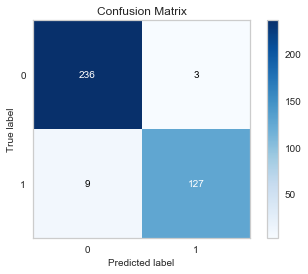

In [53]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y)
plt.show()

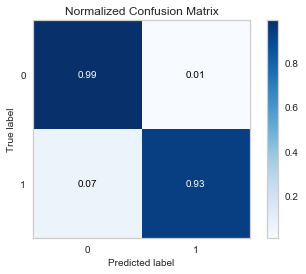

In [54]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y,normalize=True)
plt.show()

# Binary Tree

In [55]:
bin_tree = DecisionTreeClassifier()
bin_tree = bin_tree.fit(X=train_x, y=train_y)
pred_y = bin_tree.predict(test_x)

[Text(743.561320754717, 1032.8400000000001, 'Arrhythmia <= 0.5\ngini = 0.438\nsamples = 1125\nvalue = [761, 364]'),
 Text(507.9905660377359, 924.1200000000001, 'Contra <= 74.0\ngini = 0.267\nsamples = 896\nvalue = [754, 142]'),
 Text(294.7924528301887, 815.4000000000001, 'IPSI <= 87.5\ngini = 0.108\nsamples = 699\nvalue = [659, 40]'),
 Text(147.39622641509436, 706.6800000000001, 'Hypertension <= 0.5\ngini = 0.056\nsamples = 626\nvalue = [608, 18]'),
 Text(42.113207547169814, 597.96, 'History <= 0.5\ngini = 0.005\nsamples = 378\nvalue = [377, 1]'),
 Text(21.056603773584907, 489.24, 'gini = 0.0\nsamples = 374\nvalue = [374, 0]'),
 Text(63.16981132075472, 489.24, 'Indication <= 1.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(42.113207547169814, 380.5200000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(84.22641509433963, 380.5200000000001, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(252.67924528301887, 597.96, 'Contra <= 61.0\ngini = 0.128\nsamples = 248\nvalue = [

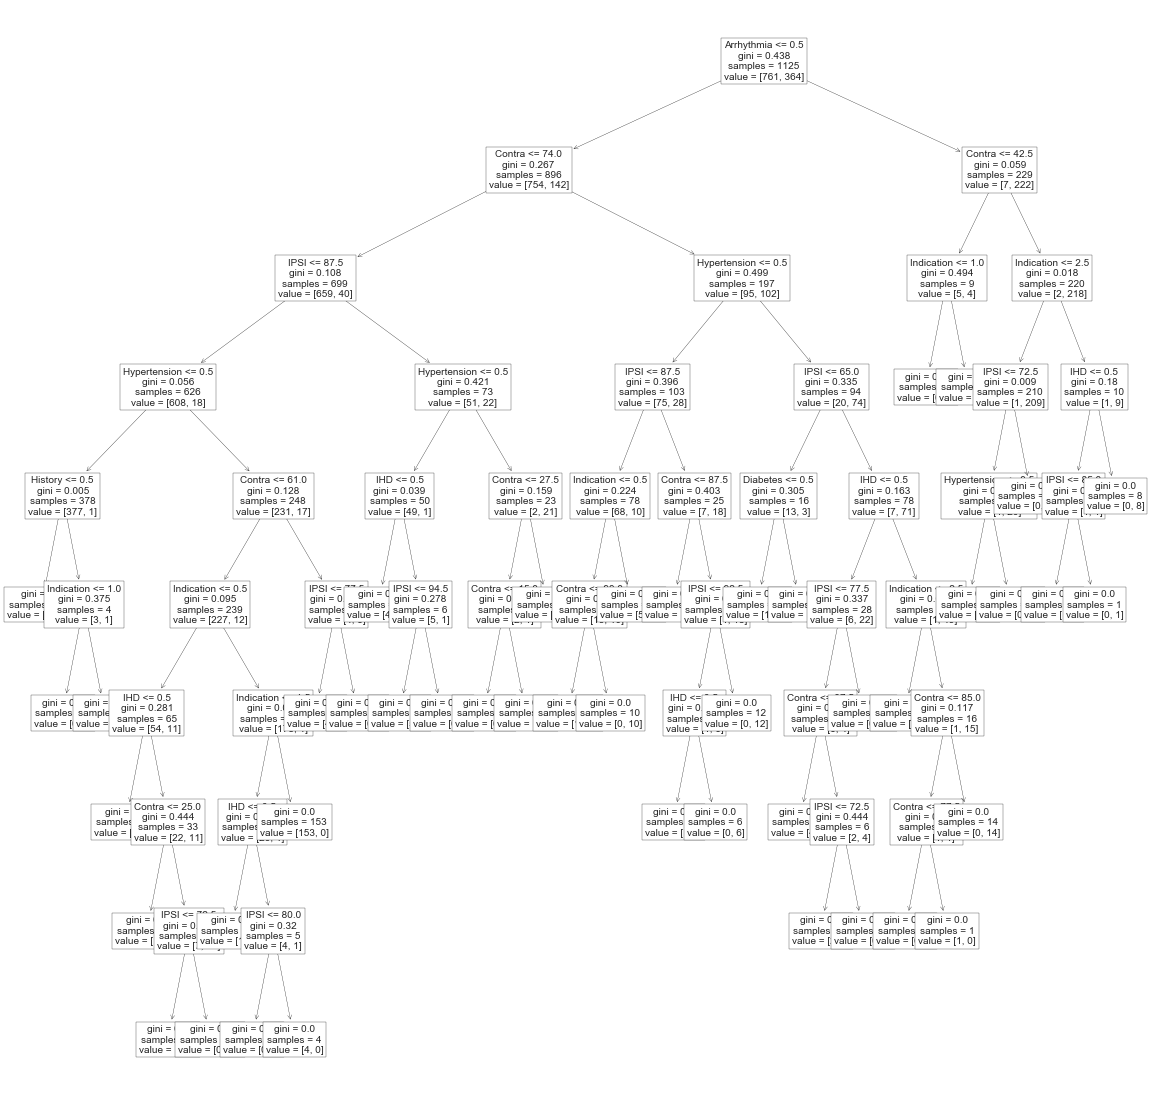

In [56]:
plt.rcParams["figure.figsize"] = (20,20)
plot_tree( bin_tree, feature_names=class_data.columns, fontsize=10)

In [57]:
plt.rcParams["figure.figsize"] = o_size
bin_tree.score(test_x,test_y)

0.976

In [58]:
Linear_report = classification_report(pred_y,test_y)
print(Linear_report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       248
           1       0.93      1.00      0.97       127

    accuracy                           0.98       375
   macro avg       0.97      0.98      0.97       375
weighted avg       0.98      0.98      0.98       375



In [59]:
cross_results = cross_validate(bin_tree,all_x,all_y,cv=5)
bin_tree_ft = ((sum(cross_results['fit_time']))/(len(cross_results['fit_time'])))
bin_tree_st = ((sum(cross_results['score_time']))/(len(cross_results['score_time'])))
bin_tree_average = ((sum(cross_results['test_score']))/(len(cross_results['test_score'])))
print(f"Average Fit time {bin_tree_ft}")
print(f"Average Prediction time {bin_tree_st}")
print(f"Average Score {bin_tree_average}")

Average Fit time 0.0025939464569091795
Average Prediction time 0.000997018814086914
Average Score 0.99


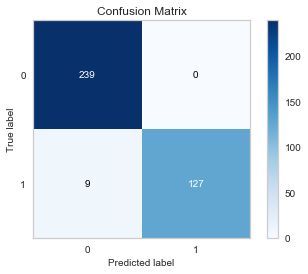

In [60]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y)
plt.show()

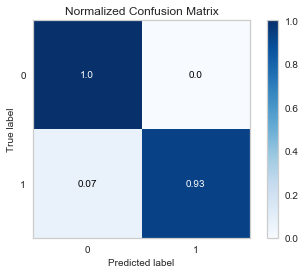

In [61]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y,normalize=True)
plt.show()

# Neural-net

In [62]:
n_net = MLPClassifier(solver='adam', max_iter=50000, hidden_layer_sizes=(100),batch_size=10)
n_net = n_net.fit(train_x,train_y)
pred_y = n_net.predict(test_x)
n_net.score(test_x,test_y)

0.9573333333333334

In [63]:
print(classification_report(pred_y,test_y))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       247
           1       0.91      0.97      0.94       128

    accuracy                           0.96       375
   macro avg       0.95      0.96      0.95       375
weighted avg       0.96      0.96      0.96       375



In [64]:
cross_results = cross_validate(n_net,all_x,all_y,cv=5)
n_net_ft = ((sum(cross_results['fit_time']))/(len(cross_results['fit_time'])))
n_net_st = ((sum(cross_results['score_time']))/(len(cross_results['score_time'])))
n_net_average = ((sum(cross_results['test_score']))/(len(cross_results['test_score'])))
print(f"Average Fit time {n_net_ft}")
print(f"Average Prediction time {n_net_st}")
print(f"Average Score {n_net_average}")

Average Fit time 2.8627703189849854
Average Prediction time 0.002378559112548828
Average Score 0.9553333333333335


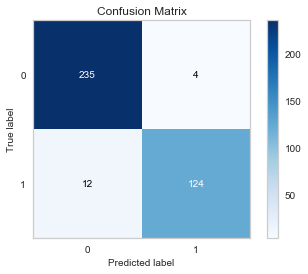

In [65]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y)
plt.show()

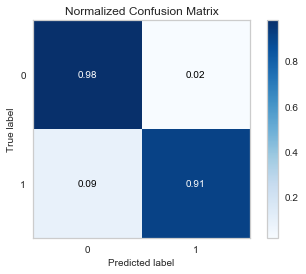

In [66]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y,normalize=True)
plt.show()

# Random Forest

In [67]:
rand_for = RandomForestClassifier(n_estimators=50)
rand_for = rand_for.fit(train_x,train_y)
pred_y = rand_for.predict(test_x)
rand_for.score(test_x,test_y)

0.976

In [68]:
print(classification_report(pred_y,test_y))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       248
           1       0.93      1.00      0.97       127

    accuracy                           0.98       375
   macro avg       0.97      0.98      0.97       375
weighted avg       0.98      0.98      0.98       375



In [69]:
cross_results = cross_validate(rand_for,all_x,all_y,cv=5)
rand_for_ft = ((sum(cross_results['fit_time']))/(len(cross_results['fit_time'])))
rand_for_st = ((sum(cross_results['score_time']))/(len(cross_results['score_time'])))
rand_for_average = ((sum(cross_results['test_score']))/(len(cross_results['test_score'])))
print(f"Average Fit time {rand_for_ft}")
print(f"Average Prediction time {rand_for_st}")
print(f"Average Score {rand_for_average}")

Average Fit time 0.07078638076782226
Average Prediction time 0.006182813644409179
Average Score 0.9866666666666667


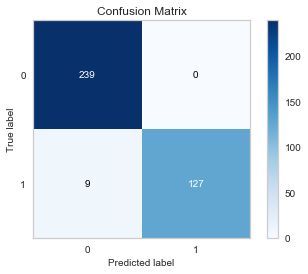

In [70]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y)
plt.show()

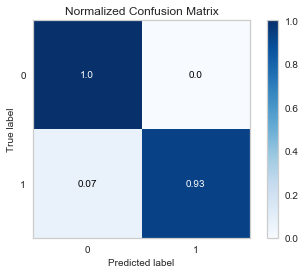

In [71]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y,normalize=True)
plt.show()